# 시계열 데이터 예측(Time-Series Prediction)
시계열 데이터 예측을 위해 ARIMA(Auto-regressive Integrated Moving Average)에 대해 알아보고, ARIMA를 활용해서 주식 종목의 가격을 예측해본다.

```
학습 목표
시계열 데이터의 특성과 안정적(Stationary) 시계열의 개념을 이해한다.
ARIMA 모델을 구성하는 AR, MA, Diffencing의 개념을 이해하고 간단한 시계열 데이터에 적용해 본다.
실제 주식 데이터에 ARIMA를 적용해서 예측 정확도를 확인해 본다.
```


# STEP 1 : 시계열 데이터 준비

**시계열** :시간 순서대로 발생한 데이터의 수열       
                 
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>Y</mi>
  <mo>=</mo>
  <mo fence="false" stretchy="false">{</mo>
  <msub>
    <mi>Y</mi>
    <mi>t</mi>
  </msub>
  <mo>:</mo>
  <mi>t</mi>
  <mo>&#x2208;</mo>
  <mi>T</mi>
  <mo fence="false" stretchy="false">}</mo>
  <mtext>, where&#xA0;</mtext>
  <mi>T</mi>
  <mtext>&#xA0;is the index set</mtext>
</math>    
       
**미래 예측을 위한 전제**
1. 과거의 데이터에 일정한 패턴이 발견된다.
2. 과거의 패턴은 미래에도 동일하게 반복될 것이다.    

**안정적(Stationary)데이터에 한해 미래 예측이 가능하다** => 데이터의 통계적 속성이 변하지 않음   
하지만 시계열 데이터 분석은 한계가 있다. 예측하지 못한 외부적 변수에 의해 시계열 데이터 분석의 전제가 되는 안정성(stationaruty)가 훼손될 가능성이 높기 때문이다.

## Stationary-Time series data



|**안정적 시계열 데이터의 특징**   |
|---|
|시간의 추이와 관계없이***평균, 분산, 자기공분산***이    일정하다|


|**Covariance(공분산)**|**Correlation(상관계수)**|
|---|---|
| X, Y 변수의 단위 크기에 영향을 받는다.<br>그 자체가 두 변수 간의 상관성을 직접적으로 대표하지 못한다.| Covariance를 두 변수의 표준편차의 곱으로 나눠서(Covariance를 Normalize하여)<br> 두 변수 간의 상관성이 항상 -1에서 1 사이의 값으로 표현되도록 보정한 값 |

### 공분산(Covariance)
각 확률변수들이 어떻게 퍼져있는지를 나타낸다.
![공분산](https://t1.daumcdn.net/cfile/tistory/2533B54B58BD19341C)
```
Cov(X, Y) > 0    X가 증가 할 때 Y도 증가한다.

Cov(X, Y) < 0    X가 증가 할 때 Y는 감소한다.

Cov(X, Y) = 0    공분산이 0이라면 두 변수간에는 아무런 선형관계가 없으며 두 변수는 서로 독립적인 관계에 있음을 알 수 있다.

        그러나 두 변수가 독립적이라면 공분산은 0이 되지만, 공분산이 0이라고 해서 항상 독립적이라고 할 수 없다.
```


***공분산 : X의 편차와 Y의 편차를 곱한 평균***
![공분산값](https://t1.daumcdn.net/cfile/tistory/2452DB5058BD088437)    


### 상관계수(Correlation)
***확률변수의 절대적 크기에 영향받지 않도록 단위화***    
분산의 크기만큼 나누어준다
![상관계수](https://t1.daumcdn.net/cfile/tistory/2553E24F58BD13EA19)
```
1. 상관계수의 절대값은 1을 넘을 수 없다.
2. 확률변수 X, Y가 독립이라면 상관계수는 0이다.
3. X와 Y가 선형적 관계라면 상관계수는 1 혹은 -1이다.
      양의 선형관계면 1, 음의 선형관계면 -1
```

다시 안정적 시계열이 가져야 할 요건으로 돌아와 보겠습니다. 우리는 과거 몇 개의 데이터를 통해 다음 데이터를 예측해 보려고 합니다. 예를 들어 직전 5년 치 판매량 X(t-4), X(t-3), X(t-2), X(t-1), X(t)를 가지고 X(t+1)이 얼마일지 예측을 해보고 싶다고 합시다.

이 예측이 의미가 있으려면 중요한 것은 t에 무관하게 이 예측이 맞아떨어져야 한다는 점입니다. t=2010일 때의 데이터를 가지고 X(2011)을 정확하게 예측하는 모델이라면 이 모델에 t=2020을 대입해도 이 모델이 X(2021)을 정확하게 예측할 수 있어야 한다는 것입니다. 그러려면 t에 무관하게 X(t-4), X(t-3), X(t-2), X(t-1), X(t)의 평균과 분산이 일정 범위 안에 있어야 합니다. 또한 X(t-h)와 X(t)는 t에 무관하게 h에 대해서만 달라지는 일정한 상관도를 가져야 합니다. 그렇지 않으면 우리의 시계열 예측은 t에 따라 달라지는, '그때그때 달라요' 예측이 됩니다. 이것은 '과거의 패턴이 미래에도 반복될 것이다'라는 시계열 예측의 대전제를 무너뜨립니다.

Pandas에서 제공하는 Series 자료 구조 활용.     
시간 컬럼을 index로 하는 Series표현

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/005930.KS.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()

#date를 index로 삼는 시계열 데이터 생성

Date
2000-01-04    6110.0
2000-01-05    5580.0
2000-01-06    5620.0
2000-01-07    5540.0
2000-01-10    5770.0
Name: Close, dtype: float64

In [2]:
ts=ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

Series([], Name: Close, dtype: float64)

# STEP 2 : 각종 전처리 수행


In [3]:
ts=ts.interpolate(method='time')
ts[ts.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.# 결측치 처리
#결측치가 존재하면 통계분석시 결과에 악영향이 나타나기 때문에 꼭 제거해줍니다.
#결측치 제거 방법
#!제거
#!보간(interpolate)/ 보간 기준 = time

Series([], Name: Close, dtype: float64)

In [4]:
# 로그 변환
ts_log = np.log(ts)

# STEP 3 : 시계열 안정성 분석
-정성적 그래프 분석
-정량적 Augmented Dicky-Fuller Test
-시계열 분해(Time Series Decomposition)
-Residual 안정성 확인

statsmodels 패키지는 R에서 제공하는 통계검정, 시계열분석 등의 기능을 파이썬에서도 이용할 수 있도록 하는 강력한 통계 패키지입니다. 이번 노드에서는 statsmodels 패키지의 기능을 자주 활용하게 될 것입니다. 아래는 statsmodels 패키지에서 제공하는 adfuller 메소드를 이용해 주어진 timeseries에 대한 Augmented Dickey-Fuller Test를 수행하는 코드입니다.

In [5]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
#일정 시간 내 구간 통계치 시각화. 

In [6]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

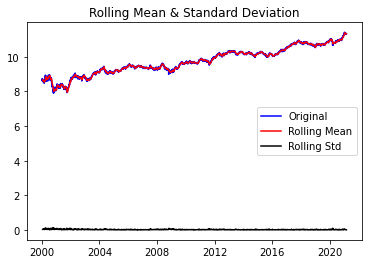

Results of Dickey-Fuller Test:
Test Statistic                   -0.320697
p-value                           0.922521
#Lags Used                        4.000000
Number of Observations Used    5316.000000
Critical Value (1%)              -3.431581
Critical Value (5%)              -2.862084
Critical Value (10%)             -2.567059
dtype: float64


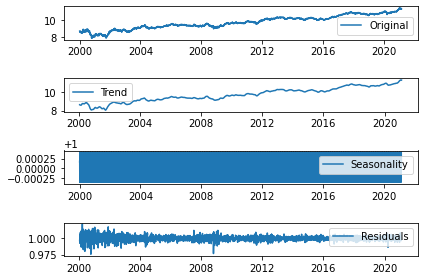

In [7]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [8]:
# Residual 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.760788e+01
p-value                        3.892611e-30
#Lags Used                     3.300000e+01
Number of Observations Used    5.257000e+03
Critical Value (1%)           -3.431595e+00
Critical Value (5%)           -2.862090e+00
Critical Value (10%)          -2.567063e+00
dtype: float64


# STEP 4 : 학습, 테스트 데이터셋 생성


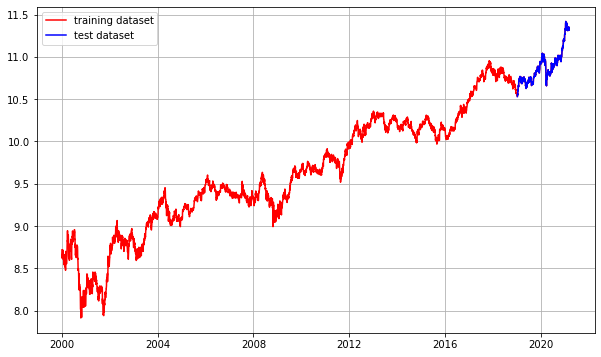

In [9]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

# STEP 5 : 적정 ARIMA 모수 찾기
ACF, PACF 그려보기 -> p,q 구하기
차분 안정성 확인 -> d 구하기

ARIMA 모델의 정의
이전 스텝에서 우리는 시계열 데이터가 Trend와 Seasonality와 Residual로 Decompose되며, Trend와 Seasonality를 효과적으로 분리해 낸 경우 아주 예측력 있는 안정적인 시계열 데이터로 변환 가능하다는 것을 확인하였습니다.

바로 이런 원리를 활용하여 시계열 데이터 예측모델을 자동으로 만들어 주는 모델이 있습니다. 바로 오늘 소개하게 될 ARIMA(Autoregressive Integrated Moving Average)입니다.

ARIMA는 AR(Autoregressive) + I(Integrated) + MA(Moving Average)가 합쳐진 모델입니다. 각각의 개념을 하나하나 살펴보면 바로 지금까지 우리가 다루어온 개념들과 닮아 있음을 알게 됩니다.

### AR(자기회귀, Autoregressive)
- 자기회귀(AR)란 가 이전 p개의 데이터<math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>Y</mi>
    <mrow>
      <mi>t</mi>
      <mo>&#x2212;</mo>
      <mn>1</mn>
    </mrow>
  </msub>
  <mo>,</mo>
  <msub>
    <mi>Y</mi>
    <mrow>
      <mi>t</mi>
      <mo>&#x2212;</mo>
      <mn>2</mn>
    </mrow>
  </msub>
  <mo>,</mo>
  <mo>.</mo>
  <mo>.</mo>
  <mo>.</mo>
  <mo>,</mo>
  <msub>
    <mi>Y</mi>
    <mrow>
      <mi>t</mi>
      <mo>&#x2212;</mo>
      <mi>p</mi>
    </mrow>
  </msub>
</math>  의 가중합으로 수렴한다고 보는 모델입니다.
- 가중치의 크기가 1보다 작은  <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>Y</mi>
    <mrow>
      <mi>t</mi>
      <mo>&#x2212;</mo>
      <mn>1</mn>
    </mrow>
  </msub>
  <mo>,</mo>
  <msub>
    <mi>Y</mi>
    <mrow>
      <mi>t</mi>
      <mo>&#x2212;</mo>
      <mn>2</mn>
    </mrow>
  </msub>
  <mo>,</mo>
  <mo>.</mo>
  <mo>.</mo>
  <mo>.</mo>
  <mo>,</mo>
  <msub>
    <mi>Y</mi>
    <mrow>
      <mi>t</mi>
      <mo>&#x2212;</mo>
      <mi>p</mi>
    </mrow>
  </msub>
</math>의 가중합으로 수렴하는 자기회귀 모델과 안정적 시계열은 통계학적으로 동치입니다.
- AR은 일반적인 시계열에서 Trend와 Seasonality를 제거한 Residual에 해당하는 부분을 모델링한다고 볼 수 있습니다.
- 주식값이 항상 일정한 균형 수준을 유지할 것이라고 예측하는 관점이 바로 주식 시계열을 AR로 모델링하는 관점이라고 볼 수 있습니다.


### MA(이동평균, Moving Average

이동평균(MA)은 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>Y</mi>
    <mi>t</mi>
  </msub>
</math>가 이전 q개의 예측오차값  <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>e</mi>
    <mrow>
      <mi>t</mi>
      <mo>&#x2212;</mo>
      <mn>1</mn>
    </mrow>
  </msub>
  <mo>,</mo>
  <msub>
    <mi>e</mi>
    <mrow>
      <mi>t</mi>
      <mo>&#x2212;</mo>
      <mn>2</mn>
    </mrow>
  </msub>
  <mo>,</mo>
  <mo>.</mo>
  <mo>.</mo>
  <mo>.</mo>
  <mo>,</mo>
  <msub>
    <mi>e</mi>
    <mrow>
      <mi>t</mi>
      <mo>&#x2212;</mo>
      <mi>q</mi>
    </mrow>
  </msub>
</math>의 가중합으로 수렴한다고 보는 모델입니다.
- MA는 일반적인 시계열에서 Trend에 해당하는 부분을 모델링한다고 볼 수 있습니다. 예측오차값<math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>e</mi>
    <mrow>
      <mi>t</mi>
      <mo>&#x2212;</mo>
      <mn>1</mn>
    </mrow>
  </msub>
</math> 이 +라면 모델 예측보다 관측값이 더 높았다는 뜻이므로, 다음  <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>Y</mi>
    <mi>t</mi>
  </msub>
</math>예측 시에는 예측치를 올려잡게 됩니다.
- 주식값은 항상 최근의 증감 패턴이 지속될 것이라고 예측하는 관점이 바로 주식 시계열을 MA로 모델링하는 관점이라고 볼 수 있습니다.

### I(차분누적, Integration)

- 차분누적은 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>Y</mi>
    <mi>t</mi>
  </msub>
</math>이 이전 데이터와 d차 차분의 누적(integration) 합이라고 보는 모델입니다.
- 예를 들어서 d=1이라면 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>Y</mi>
    <mi>t</mi>
  </msub>
</math>는 <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>Y</mi>
    <mrow>
      <mi>t</mi>
      <mo>&#x2212;</mo>
      <mn>1</mn>
    </mrow>
  </msub>
</math>과  <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>&#x394;</mi>
  <msub>
    <mi>Y</mi>
    <mrow>
      <mi>t</mi>
      <mo>&#x2212;</mo>
      <mn>1</mn>
    </mrow>
  </msub>
</math>의 합으로 보는 것입니다.
- I는 일반적인 시계열에서 Seasonality에 해당하는 부분을 모델링한다고 볼 수 있습니다.
ARIMA는 위 3가지 모델을 모두 한꺼번에 고려하는 모델입니다. 주식값을 예측하는 우리의 태도와 비슷하지 않나요? 위 그림에서 보듯 어제 주식값이 떨어졌다는 것을 알게 되었을 때, '오늘은 주식이 올라서 균형을 맞추겠지?'라는 AR 형태의 기대와 '어제 떨어졌으니 추세적으로 계속 떨어지지 않을까?'라는 MA 형태의 우려가 동시에 떠오르게 됩니다. ARIMA는 이 두 모델 사이에서 적정 가중치를 찾아가는 훨씬 통합적인 예측 능력을 보여 줍니다.

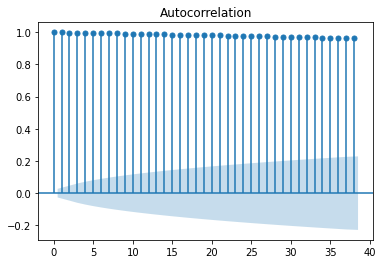

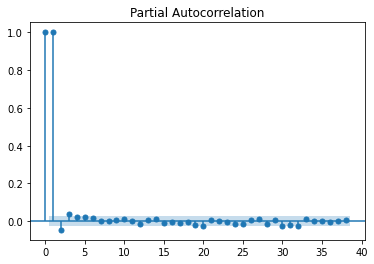

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()


Results of Dickey-Fuller Test:
Test Statistic                  -40.116239
p-value                           0.000000
#Lags Used                        3.000000
Number of Observations Used    5316.000000
Critical Value (1%)              -3.431581
Critical Value (5%)              -2.862084
Critical Value (10%)             -2.567059
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -21.847485
p-value                           0.000000
#Lags Used                       33.000000
Number of Observations Used    5285.000000
Critical Value (1%)              -3.431588
Critical Value (5%)              -2.862087
Critical Value (10%)             -2.567061
dtype: float64


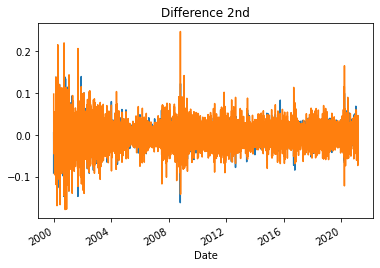

In [11]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

# STEP 6 : ARIMA 모델 훈련과 테스트

ARIMA 모델 빌드와 훈련
모델 테스트 및 플로팅
최종 예측 모델 정확도 측정(MAPE)

In [12]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(8, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

/home/aiffel-dj57/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel-dj57/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4787
Model:                 ARIMA(8, 1, 0)   Log Likelihood               11305.591
Method:                       css-mle   S.D. of innovations              0.023
Date:                Thu, 04 Mar 2021   AIC                         -22591.182
Time:                        22:09:05   BIC                         -22526.445
Sample:                             1   HQIC                        -22568.443
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0004      0.000      1.350      0.177      -0.000       0.001
ar.L1.D.Close     0.0411      0.014      2.840      0.005       0.013       0.069
ar.L2.D.Close    -0.0761      0.014     

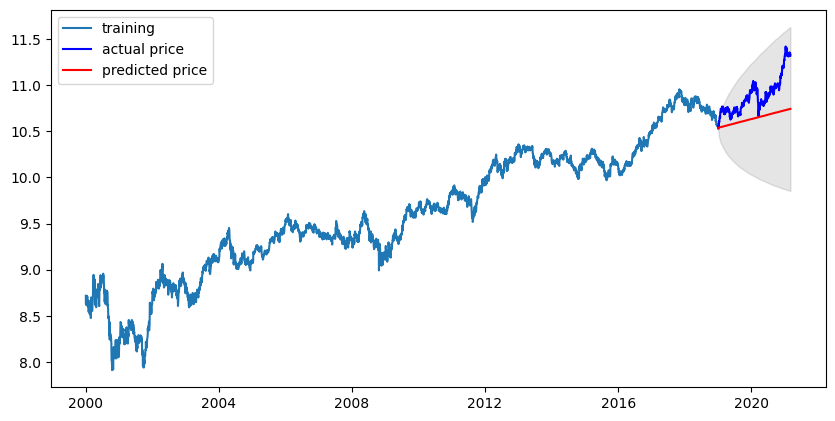

In [13]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  250667180.40194875
MAE:  12621.195642461904
RMSE:  15832.472340160546
MAPE: 21.03%


# STEP 7 : 다른 주식 종목 예측해 보기


### TSLA

In [39]:
#요즘 핫한 테슬라를 가져와봅니다.

dataset_filepath2 = os.getenv('HOME') + '/aiffel/stock_prediction/data/TSLA.csv'
df2 = pd.read_csv(dataset_filepath2, index_col='Date', parse_dates=True)
ts2 = df2['Close']


In [40]:
ts2.head()

Date
2010-06-29    4.778
2010-06-30    4.766
2010-07-01    4.392
2010-07-02    3.840
2010-07-06    3.222
Name: Close, dtype: float64

In [41]:
ts2=ts2.interpolate(method='time')
ts2[ts2.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

# 로그 변환
ts2_log = np.log(ts2)

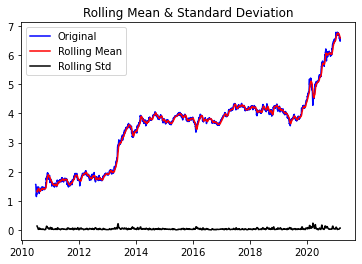

Results of Dickey-Fuller Test:
Test Statistic                    0.394921
p-value                           0.981304
#Lags Used                        0.000000
Number of Observations Used    2687.000000
Critical Value (1%)              -3.432786
Critical Value (5%)              -2.862616
Critical Value (10%)             -2.567343
dtype: float64


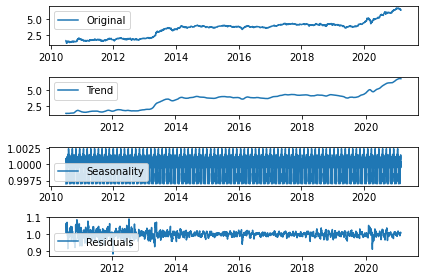

In [42]:
# 정성적 그래프 분석
plot_rolling_statistics(ts2_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts2_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition2 = seasonal_decompose(ts2_log, model='multiplicative', period = 30) 

trend2 = decomposition2.trend
seasonal2 = decomposition2.seasonal
residual2 = decomposition2.resid

plt.subplot(411)
plt.plot(ts2_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend2, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal2,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual2, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [49]:
residual2.dropna(inplace=True)
augmented_dickey_fuller_test(residual2)

Results of Dickey-Fuller Test:
Test Statistic                -1.260241e+01
p-value                        1.724662e-23
#Lags Used                     2.800000e+01
Number of Observations Used    2.629000e+03
Critical Value (1%)           -3.432840e+00
Critical Value (5%)           -2.862640e+00
Critical Value (10%)          -2.567356e+00
dtype: float64


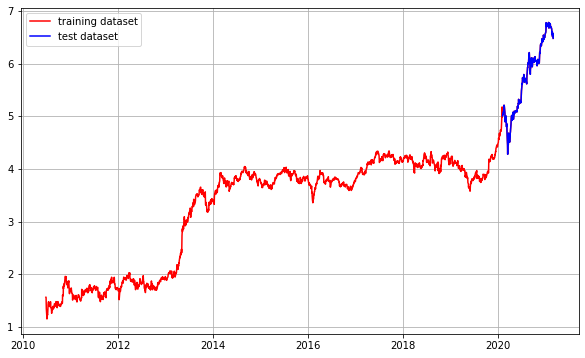

In [50]:
train_data2, test_data2 = ts2_log[:int(len(ts2_log)*0.9)], ts2_log[int(len(ts2_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts2_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data2, c='b', label='test dataset')
plt.legend()

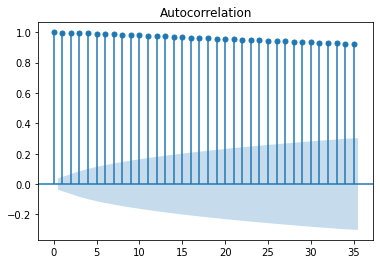

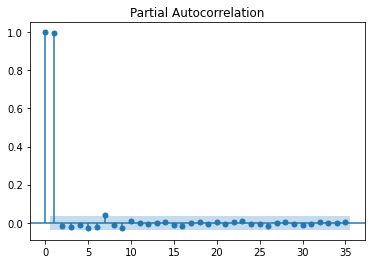

In [51]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts2_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts2_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                  -51.426539
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    2686.000000
Critical Value (1%)              -3.432787
Critical Value (5%)              -2.862617
Critical Value (10%)             -2.567343
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.653953e+01
p-value                        1.989686e-29
#Lags Used                     2.700000e+01
Number of Observations Used    2.658000e+03
Critical Value (1%)           -3.432813e+00
Critical Value (5%)           -2.862628e+00
Critical Value (10%)          -2.567349e+00
dtype: float64


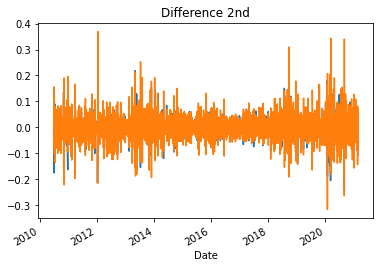

In [52]:
# 1차 차분 구하기
diff_3 = ts2_log.diff(periods=1).iloc[1:]
diff_3.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_3)

# 혹시 필요한 경우 2차 차분 구하기
diff_4 = diff_3.diff(periods=1).iloc[1:]
diff_4.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_4)

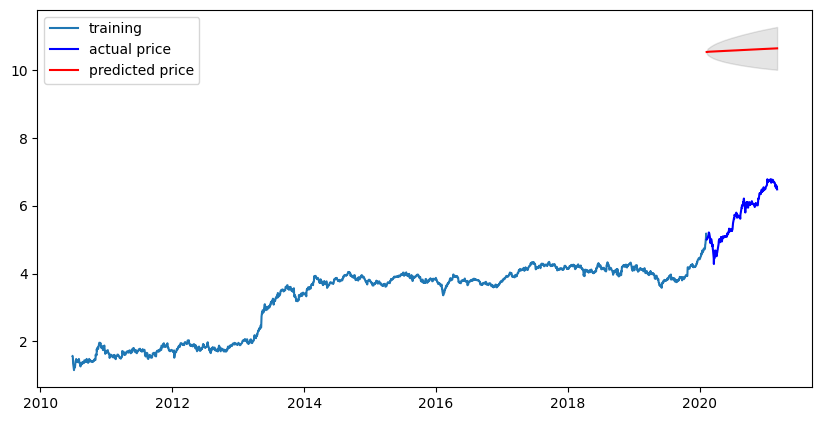

In [55]:
# Forecast : 결과가 fc에 담깁니다. 
fc2, se2, conf2 = fitted_m.forecast(len(test_data2), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series2 = pd.Series(fc2, index=test_data2.index)   # 예측결과
lower_series2 = pd.Series(conf[:, 0], index=test_data2.index)  # 예측결과의 하한 바운드
upper_series2 = pd.Series(conf[:, 1], index=test_data2.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data2, label='training')
plt.plot(test_data2, c='b', label='actual price')
plt.plot(fc_series2, c='r',label='predicted price')
plt.fill_between(lower_series2.index, lower_series2, upper_series2, color='k', alpha=.10)
plt.legend()
plt.show()

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse2 = mean_squared_error(np.exp(test_data2), np.exp(fc2))
print('MSE: ', mse2)

mae2 = mean_absolute_error(np.exp(test_data2), np.exp(fc2))
print('MAE: ', mae2)

rmse2 = math.sqrt(mean_squared_error(np.exp(test_data2), np.exp(fc2)))
print('RMSE: ', rmse2)

mape2 = np.mean(np.abs(np.exp(fc2) - np.exp(test_data2))/np.abs(np.exp(test_data2)))
print('MAPE: {:.2f}%'.format(mape2*100))

MSE:  1550420823.508821
MAE:  39363.60228949479
RMSE:  39375.38347126058
MAPE: 15457.02%


# TSLA 예측 데이터 결과
엄청 별론데 이유를 모르겠네요....

# Kakao Corp. 035720.KS

In [60]:
#더 핫한 카카오를 가져와봅니다.
dataset_filepath3 = os.getenv('HOME') + '/aiffel/stock_prediction/data/035720.KS.csv'
df3 = pd.read_csv(dataset_filepath3, index_col='Date', parse_dates=True)
ts3 = df3['Close']


In [62]:
ts3.head()

Date
2000-02-11    273000.0
2000-02-14    247000.0
2000-02-15    217500.0
2000-02-16    243500.0
2000-02-17    243500.0
Name: Close, dtype: float64

In [63]:
ts3=ts3.interpolate(method='time')
ts3[ts3.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

# 로그 변환
ts3_log = np.log(ts3)


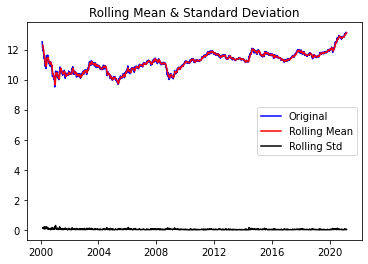

Results of Dickey-Fuller Test:
Test Statistic                   -1.240342
p-value                           0.656005
#Lags Used                        5.000000
Number of Observations Used    5287.000000
Critical Value (1%)              -3.431587
Critical Value (5%)              -2.862087
Critical Value (10%)             -2.567061
dtype: float64


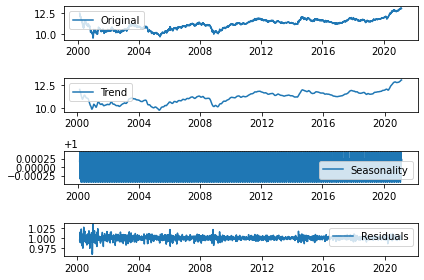

In [64]:
# 정성적 그래프 분석
plot_rolling_statistics(ts3_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts3_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition3 = seasonal_decompose(ts3_log, model='multiplicative', period = 30) 

trend3 = decomposition3.trend
seasonal3 = decomposition3.seasonal
residual3 = decomposition3.resid

plt.subplot(411)
plt.plot(ts3_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend3, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal3,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual3, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()



In [65]:
residual3.dropna(inplace=True)
augmented_dickey_fuller_test(residual3)

Results of Dickey-Fuller Test:
Test Statistic                -1.790651e+01
p-value                        2.940214e-30
#Lags Used                     3.300000e+01
Number of Observations Used    5.229000e+03
Critical Value (1%)           -3.431601e+00
Critical Value (5%)           -2.862093e+00
Critical Value (10%)          -2.567064e+00
dtype: float64


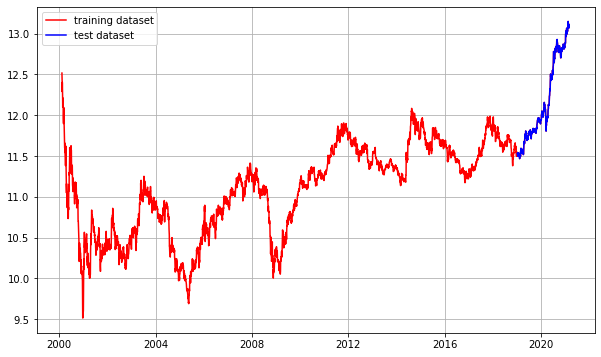

In [66]:
train_data3, test_data3 = ts3_log[:int(len(ts3_log)*0.9)], ts3_log[int(len(ts3_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts3_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data3, c='b', label='test dataset')
plt.legend()

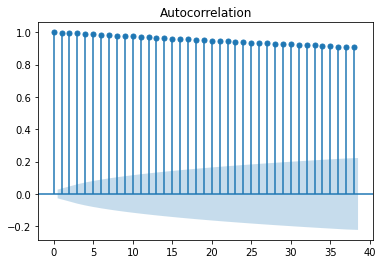

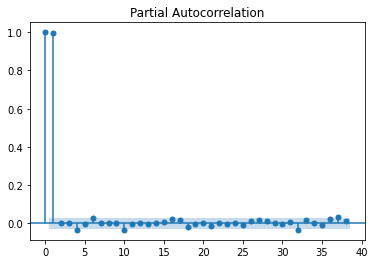

Results of Dickey-Fuller Test:
Test Statistic                  -32.361509
p-value                           0.000000
#Lags Used                        4.000000
Number of Observations Used    5287.000000
Critical Value (1%)              -3.431587
Critical Value (5%)              -2.862087
Critical Value (10%)             -2.567061
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -22.044477
p-value                           0.000000
#Lags Used                       31.000000
Number of Observations Used    5259.000000
Critical Value (1%)              -3.431594
Critical Value (5%)              -2.862090
Critical Value (10%)             -2.567063
dtype: float64


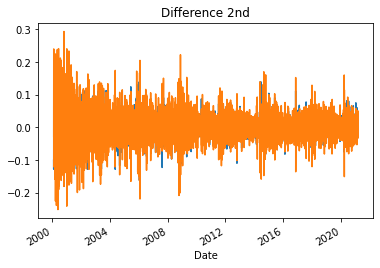

In [70]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts3_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts3_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

# 1차 차분 구하기
diff_5 = ts3_log.diff(periods=1).iloc[1:]
diff_5.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_5)

# 혹시 필요한 경우 2차 차분 구하기
diff_6 = diff_5.diff(periods=1).iloc[1:]
diff_6.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_6)



In [72]:
# Forecast : 결과가 fc에 담깁니다. 
fc3, se3, conf3 = fitted_m.forecast(len(test_data3), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series3 = pd.Series(fc3, index=test_data3.index)   # 예측결과
lower_series3 = pd.Series(conf[:, 0], index=test_data3.index)  # 예측결과의 하한 바운드
upper_series3 = pd.Series(conf[:, 1], index=test_data3.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data3, label='training')
plt.plot(test_data3, c='b', label='actual price')
plt.plot(fc_series3, c='r',label='predicted price')
plt.fill_between(lower_series3.index, lower_series3, upper_series3, color='k', alpha=.10)
plt.legend()
plt.show()

ValueError: Length of passed values is 269, index implies 530.

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse3 = mean_squared_error(np.exp(test_data3), np.exp(fc3))
print('MSE: ', mse3)

mae3 = mean_absolute_error(np.exp(test_data3), np.exp(fc3))
print('MAE: ', mae3)

rmse3 = math.sqrt(mean_squared_error(np.exp(test_data3), np.exp(fc3)))
print('RMSE: ', rmse3)

mape3 = np.mean(np.abs(np.exp(fc3) - np.exp(test_data3))/np.abs(np.exp(test_data3)))
print('MAPE: {:.2f}%'.format(mape3*100))

MSE:  46454556608.50196
MAE:  181323.5237865635
RMSE:  215533.1914311621
MAPE: 76.54%


# apple

In [75]:
#애플도 가져와볼게요
dataset_filepath4 = os.getenv('HOME') + '/aiffel/stock_prediction/data/AAPL.csv'
df4 = pd.read_csv(dataset_filepath4, index_col='Date', parse_dates=True)
ts4 = df4['Close']


ts4=ts4.interpolate(method='time')
ts4[ts4.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다. 

# 로그 변환
ts4_log = np.log(ts4)


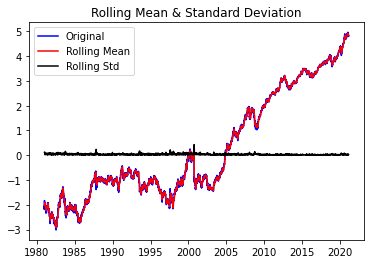

Results of Dickey-Fuller Test:
Test Statistic                     0.479931
p-value                            0.984250
#Lags Used                        14.000000
Number of Observations Used    10126.000000
Critical Value (1%)               -3.430996
Critical Value (5%)               -2.861825
Critical Value (10%)              -2.566922
dtype: float64


ValueError: Multiplicative seasonality is not appropriate for zero and negative values

In [76]:
# 정성적 그래프 분석
plot_rolling_statistics(ts4_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts4_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition4 = seasonal_decompose(ts4_log, model='multiplicative', period = 30) 

trend4 = decomposition4.trend
seasonal4 = decomposition4.seasonal
residual4 = decomposition4.resid

plt.subplot(411)
plt.plot(ts4_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend4, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal4,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual4, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()



In [31]:
residual4.dropna(inplace=True)
augmented_dickey_fuller_test(residual4)

Results of Dickey-Fuller Test:
Test Statistic                -1.760788e+01
p-value                        3.892611e-30
#Lags Used                     3.300000e+01
Number of Observations Used    5.257000e+03
Critical Value (1%)           -3.431595e+00
Critical Value (5%)           -2.862090e+00
Critical Value (10%)          -2.567063e+00
dtype: float64


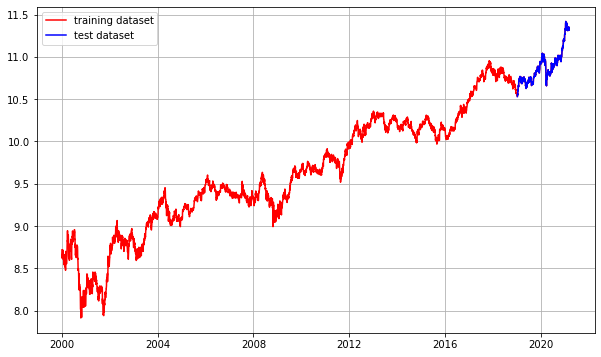

In [32]:
train_data4, test_data4 = ts4_log[:int(len(ts4_log)*0.9)], ts3_log[int(len(ts4_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts4_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data4, c='b', label='test dataset')
plt.legend()

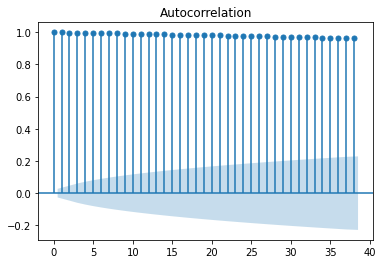

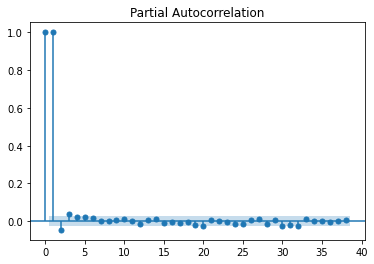

Results of Dickey-Fuller Test:
Test Statistic                  -40.116239
p-value                           0.000000
#Lags Used                        3.000000
Number of Observations Used    5316.000000
Critical Value (1%)              -3.431581
Critical Value (5%)              -2.862084
Critical Value (10%)             -2.567059
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -21.847485
p-value                           0.000000
#Lags Used                       33.000000
Number of Observations Used    5285.000000
Critical Value (1%)              -3.431588
Critical Value (5%)              -2.862087
Critical Value (10%)             -2.567061
dtype: float64


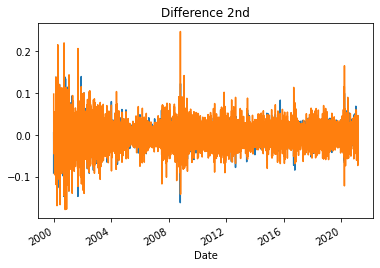

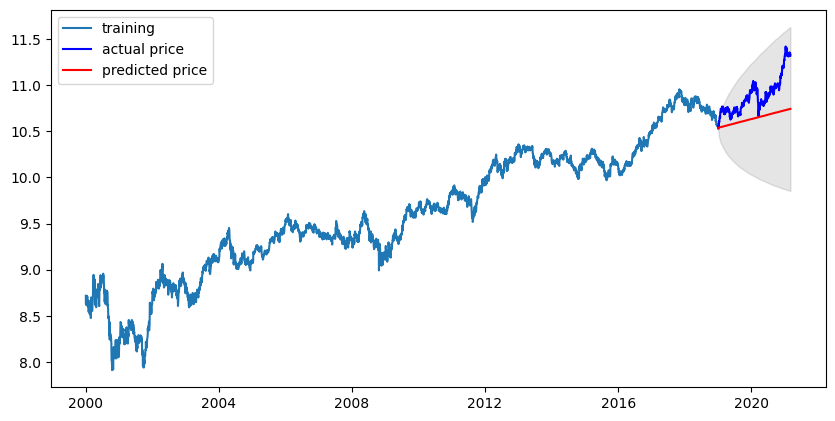

MSE:  250667180.40194875
MAE:  12621.195642461904
RMSE:  15832.472340160546
MAPE: 21.03%


In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts4_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts4_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

# 1차 차분 구하기
diff_7 = ts4_log.diff(periods=1).iloc[1:]
diff_7.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_7)

# 혹시 필요한 경우 2차 차분 구하기
diff_8 = diff_7.diff(periods=1).iloc[1:]
diff_8.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_8)

# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data4), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data4.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data4.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data4.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data4, label='training')
plt.plot(test_data4, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))